In [40]:
#importacion de columnas
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder

In [41]:
#importamos datasests de entrenamiento y agregamos modificaciones
properties_colombia_train=pd.read_csv("C:/Users/Esteban Armella/Desktop/Henry/Datathon-main/properties_colombia_train.csv" ,index_col=False)
properties_colombia_test=pd.read_csv("C:/Users/Esteban Armella/Desktop/Henry/Datathon-main/properties_colombia_test.csv", index_col=False)
pd.set_option('display.float_format', '{:1f}'.format)


In [42]:
#sacamos el promedio y creamos la veriable targuet 
promedio=properties_colombia_train.price.mean()
properties_colombia_train["Target"]=(properties_colombia_train.price > promedio).astype(int)
properties_colombia_train.Target.value_counts()

0    151191
1     46358
Name: Target, dtype: int64

<AxesSubplot:>

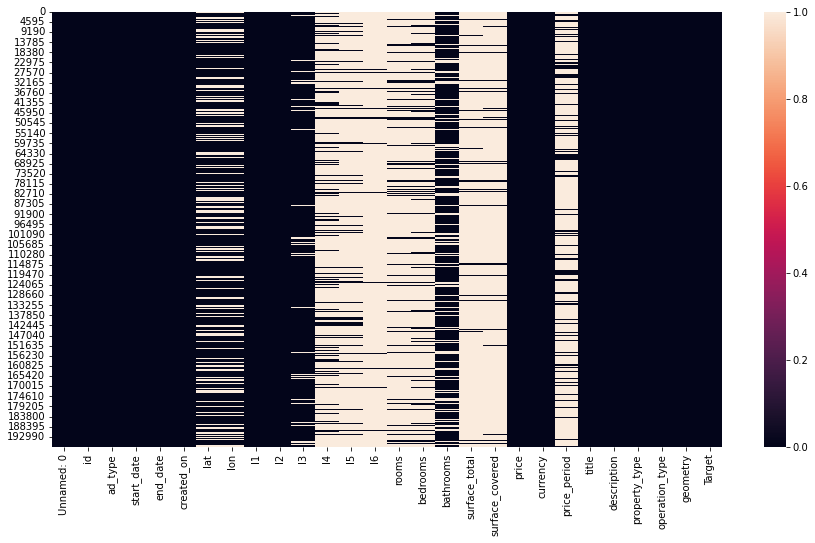

In [43]:
#vemos valores nulos en el datasets de entrnamiento 
figura= plt.subplots(figsize = (15,8))
sns.heatmap(properties_colombia_train.isnull())


In [44]:
#borramos columnas con muchos valores nulos que afectaran al modelo
#eliminamos columnas con muchos nulos 
properties_colombia_train = properties_colombia_train.drop(['currency','Unnamed: 0','ad_type','id','l1','description','lon','lat','price_period','price','rooms','bedrooms','surface_total','surface_covered','price','l4','l5','l6'], axis=1)


<AxesSubplot:>

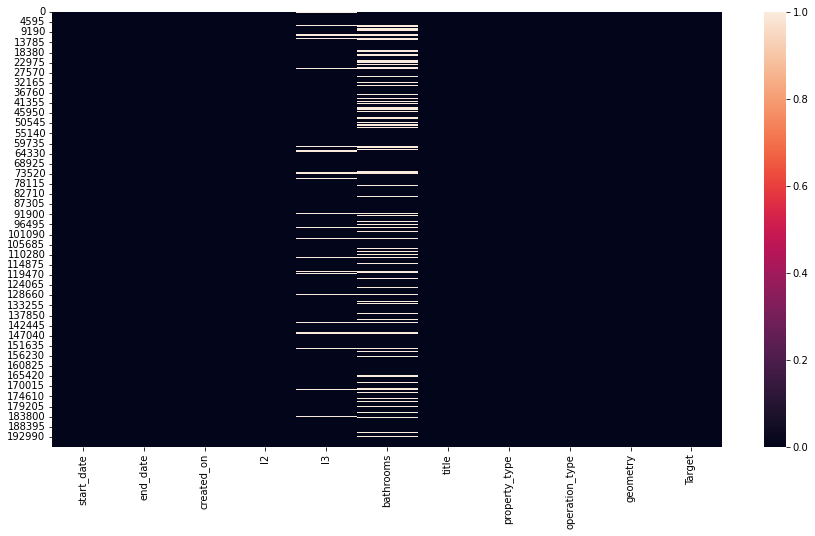

In [45]:
#revisamos la grafica de nulos 
figura= plt.subplots(figsize = (15,8))
sns.heatmap(properties_colombia_train.isnull())

In [46]:
#Remplazamos los valores nulos de la columna bathromms y colocamos Nan en columna l3
properties_colombia_train.bathrooms.fillna(properties_colombia_train.bathrooms.mean(),inplace=True)
properties_colombia_train.l3.fillna( 'Nan' ,inplace=True)

<AxesSubplot:>

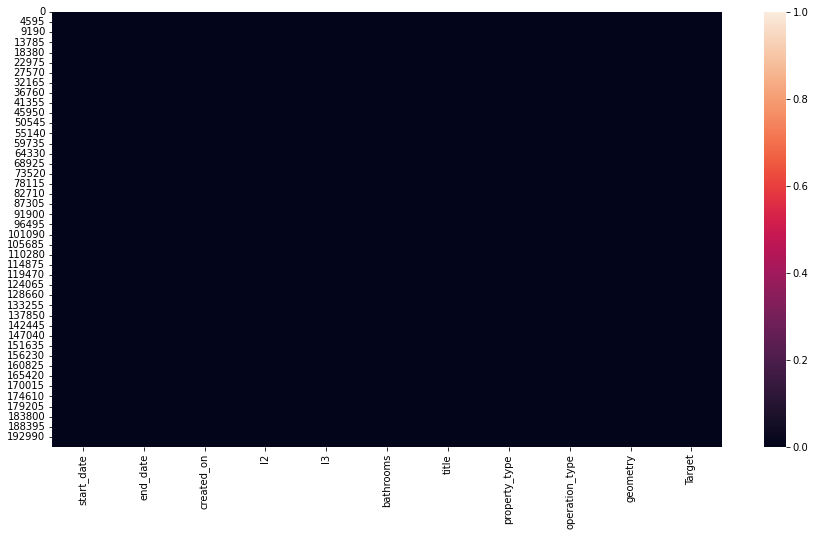

In [47]:
#revisamos el Datasets para ver que no hay nulo 
figura= plt.subplots(figsize = (15,8))
sns.heatmap(properties_colombia_train.isnull())

In [48]:
#convertimos la columna bathrooms que es del tipo float a int
properties_colombia_train.bathrooms=properties_colombia_train.bathrooms.astype('int')
properties_colombia_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   start_date      197549 non-null  object
 1   end_date        197549 non-null  object
 2   created_on      197549 non-null  object
 3   l2              197549 non-null  object
 4   l3              197549 non-null  object
 5   bathrooms       197549 non-null  int32 
 6   title           197548 non-null  object
 7   property_type   197549 non-null  object
 8   operation_type  197549 non-null  object
 9   geometry        197549 non-null  object
 10  Target          197549 non-null  int32 
dtypes: int32(2), object(9)
memory usage: 15.1+ MB


In [49]:
#convertimos variables categoricas a variables numericas  
for colu in properties_colombia_train.columns:
    if(properties_colombia_train[colu].dtype == 'object'):
        le=LabelEncoder()
        properties_colombia_train[colu]=le.fit_transform(properties_colombia_train[colu])


In [50]:
#revisamos la correlacion para determinar los x_factures 
correlacion=properties_colombia_train[:].corr()
correlacion=correlacion.sort_values(['Target'],ascending=False)
correlacion.Target.head()

Target          1.000000
bathrooms       0.423486
property_type   0.272551
end_date        0.060440
start_date      0.023880
Name: Target, dtype: float64

In [51]:
#se hace las indentaciones para la prediccion y el entrenamiento 
x_feactures=properties_colombia_train[['bathrooms','property_type']]
y_targuet=properties_colombia_train[['Target']]
x_feactures.to_numpy()
y_targuet.to_numpy()

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [52]:
#generamos datos de prueba para verificar metricas
x_train,x_test,y_train,y_test =train_test_split(x_feactures,y_targuet,test_size=0.30,random_state=42)

In [53]:
#indentamos Modelo de Regrecion Logistica y asemos el entrenamientos de los datos 
logist_model=LogisticRegression()
logist_model.fit(x_train,y_train)

c:\Users\Esteban Armella\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [54]:
#Asemos la predeccion de los factures
x_predicho_train=logist_model.predict(x_train)
x_predicho_test=logist_model.predict(x_test)

In [55]:
#Revisamos la Precicion del modelo 
print('precicion', accuracy_score(y_train,x_predicho_train))
print('precicion', accuracy_score(y_test,x_predicho_test))

precicion 0.8072951317578317
precicion 0.8101408926010293


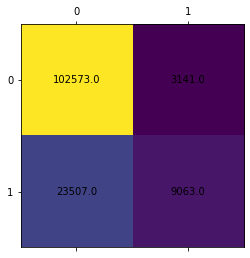

In [56]:
#Vemos la matris de confucion  y la graficamos 
matrix=confusion_matrix(y_train,x_predicho_train)
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

In [57]:
#revisamos el recall
precision = recall_score(y_test,x_predicho_test)
print(precision)


0.27886568030171166


In [58]:
#guardamos en un registro csv 

registro_1= logist_model.predict(x_test)
registro_2 = pd.DataFrame(registro_1)
registro_2.columns=['pred']
registro_2.to_csv('C:/Users/Esteban Armella/Desktop/Henry/Datathon-main/Nueva carpeta/Esteban2330.csv',index=False)

c:\Users\Esteban Armella\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


precicion 0.7935842179861734
precicion 0.7952079642284654


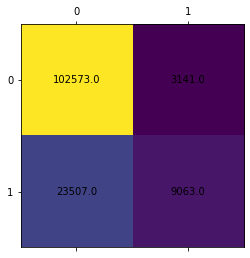

este es el recall 0.3685088482738613


In [59]:
#Pruebas de otro modelo GaussiaNb
from sklearn.naive_bayes import GaussianNB
#indentamos algoritmo de GaussianNB
modelo_Gaus=GaussianNB()
#entrenamos los factures y el targuet
modelo_Gaus.fit(x_train,y_train)
#predecimos 
x_predicho_train_gaus=modelo_Gaus.predict(x_train)
x_predicho_test_gaus=modelo_Gaus.predict(x_test)
#revisamos la precicion
print('precicion', accuracy_score(y_train,x_predicho_train_gaus))
print('precicion', accuracy_score(y_test,x_predicho_test_gaus))
#vemos la matris de confucion 
matrix_gaus=confusion_matrix(y_train,x_predicho_train)
#graficamos la matrix
fig, ax = plt.subplots(figsize=(4,5))
ax.matshow(matrix_gaus)
for (i, j), z in np.ndenumerate(matrix_gaus):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()
#revisamos el recall 
precision = recall_score(y_test,x_predicho_test_gaus)
print('este es el recall',precision)

precicion 0.03130514014636545
precicion 0.030962625495655108


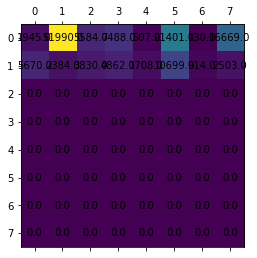

0.030962625495655108


c:\Users\Esteban Armella\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [60]:
#Prueba de otro modelo de K-Means
from sklearn.cluster import KMeans
#nstanciamos K_mens
KMeans(n_clusters=2, random_state=2)
modelo_k=KMeans()
#entrenamos K-mens
modelo_k.fit(x_train,y_train)
#predecimos kmens
x_predicho_train_k=modelo_k.predict(x_train)
x_predicho_test_k=modelo_k.predict(x_test)
#revisamos precicion
print('precicion', accuracy_score(y_train,x_predicho_train_k))
print('precicion', accuracy_score(y_test,x_predicho_test_k))
#vemos la matris de confucion 
matrix_K=confusion_matrix(y_train,x_predicho_train_k)
#graficamos la matrix
fig, ax = plt.subplots(figsize=(4,5))
ax.matshow(matrix_K)
for (i, j), z in np.ndenumerate(matrix_K):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()
#revisamos recall
precision = recall_score(y_test,x_predicho_test_k,pos_label='positive',average='micro')
print(precision)
